# Решение СЛУ итерационными методами

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['image.cmap'] = 'jet'
import matplotlib.pyplot as plt
from numba import jit

## Метод Якоби

Рассмотрим СЛУ $Ax = y$. Предположим, что матрица $A$ является матрицей с диагональным преобладанием


Рассмотрим $i$-ую строку:

$$
\sum\limits_{k=1}^n A_{ik} x_k = y_i \iff x_i = \left(y_i - \sum\limits_{k \neq i} A_{ik} x_k\right) / A_{ii}
$$

Будем теперь находить решение СЛУ итерационно, сперва проинициализировав $x_i^{(1)}$: ($t$ — номер итерации)

$$
x_{i}^{(t+1)} = \left(y_i - \sum\limits_{k \neq i} A_{ik} x_k^{(t)}\right) / A_{ii}
$$

Пусть $D$ — матрица диагональных элементов матрицы $A$. Тогда итерационный процесс можно записать в матричной форме:

$$
x^{(t+1)} = \underbrace{(I - D^{-1} A)}_{G} x^{(t)} + \underbrace{D^{-1} y}_{c}
$$

In [2]:
def initialize_jacoby(y: np.ndarray) -> np.ndarray:
    """
    Initialize a vector of zeros with the same shape as input 'y'.

    :param y: Input array.
    :return: A zero-initialized array with the same shape as 'y'.
    """
    return np.zeros_like(y)


def compute_jacoby_canon_form(amat: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    Compute the canonical form of the Jacobi method.

    G = I - D^{-1} A
    c = D^{-1} y

    :param amat: Matrix of the linear system.
    :param y: Right-hand side vector.
    :return: G matrix and c vector
    """
    n, _ = amat.shape
    gmat = np.eye(n)
    cvec = np.zeros_like(y)

    for i in range(n):
        gmat[i, :] = gmat[i, :] - amat[i, :] / amat[i, i]
        cvec[i] = y[i] / amat[i, i]
    return gmat, cvec


def compute_jacoby_single_step(x: np.ndarray, amat: np.ndarray, y: np.ndarray):
    """
    Perform a single step of the Jacobi method for a linear system.

    :param x: Current solution vector.
    :param amat: Matrix of the linear system.
    :param y: Right-hand side vector.
    :return: New solution vector after step.
    """
    return np.dot(amat, x) + y


def compute_jacoby_solution(amat: np.ndarray, y: np.ndarray, num_iter: int = 1000) -> np.ndarray:
    """
    Compute the solution using the Jacobi method for a linear system.

    :param amat: Matrix of the linear system.
    :param y: Right-hand side vector.
    :param num_iter: Number of iterations. Default is 1000.
    :return: Solution vector after the specified number of iterations.
    """
    gmat, cvec = compute_jacoby_canon_form(amat=amat, y=y)
    x_curr = initialize_jacoby(y)
    x_next = x_curr.copy()
    for _ in range(num_iter):
        x_next = compute_jacoby_single_step(x=x_curr, amat=gmat, y=cvec)
        x_curr = x_next.copy()
    return x_curr

### Матрица с диагональным преобладанием

In [3]:
from linear_system_generators import generate_diagonally_dominant_linear_system_equations

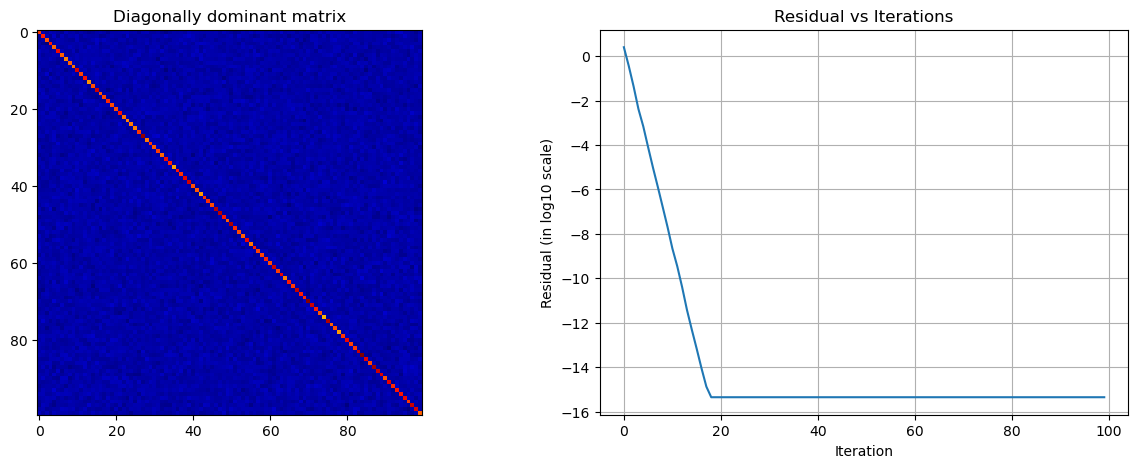

In [4]:
n = 100
amat, x_true, y = generate_diagonally_dominant_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Diagonally dominant matrix')

residuals = []
for i in range(100):
    x_pred = compute_jacoby_solution(amat=amat, y=y, num_iter=i)

    residual = np.max(np.absolute(x_true - x_pred))
    residuals.append(residual)

ax[1].plot(range(len(residuals)), np.log10(residuals))
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].grid()

plt.show()

### Тридиагональная матрица

Рассмотрим, как алгоритм ведет с трехдиагональной матрицей

In [5]:
from linear_system_generators import generate_tridiag_linear_system_equations

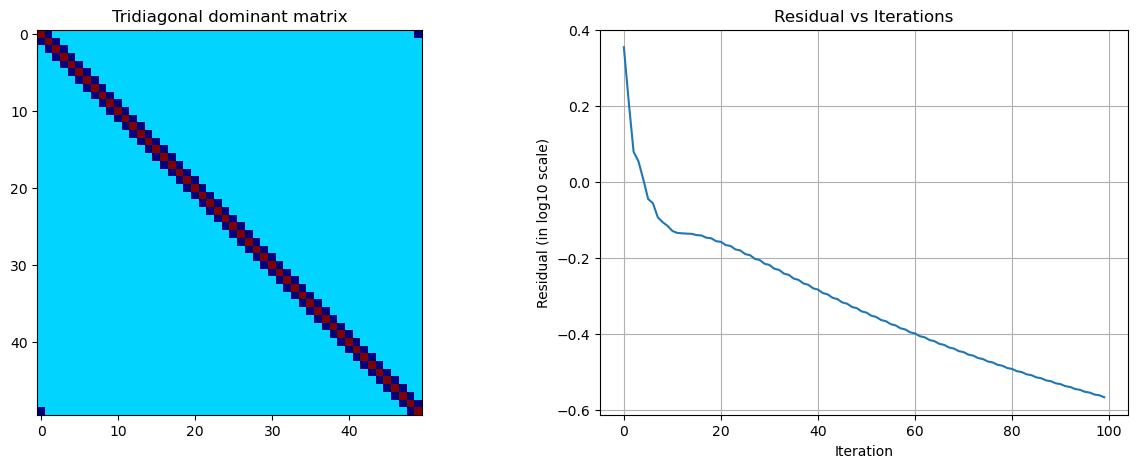

In [6]:
n = 50
amat, x_true, y = generate_tridiag_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Tridiagonal dominant matrix')

residuals = []
for i in range(100):
    x_pred = compute_jacoby_solution(amat=amat, y=y, num_iter=i)

    residual = np.max(np.absolute(x_true - x_pred))
    residuals.append(residual)

ax[1].plot(range(len(residuals)), np.log10(residuals))
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].grid()

plt.show()

Видно, что сходимость ухудшилась по сравнению с матрицей с диагональным преобладанием

### Матрица со слабым диагональным преобладанием

Теперь проверим алгоритм, когда матрица не с таким сильным диагональным преобладанием

In [7]:
from linear_system_generators import generate_weak_diagonally_dominant_linear_system_equations

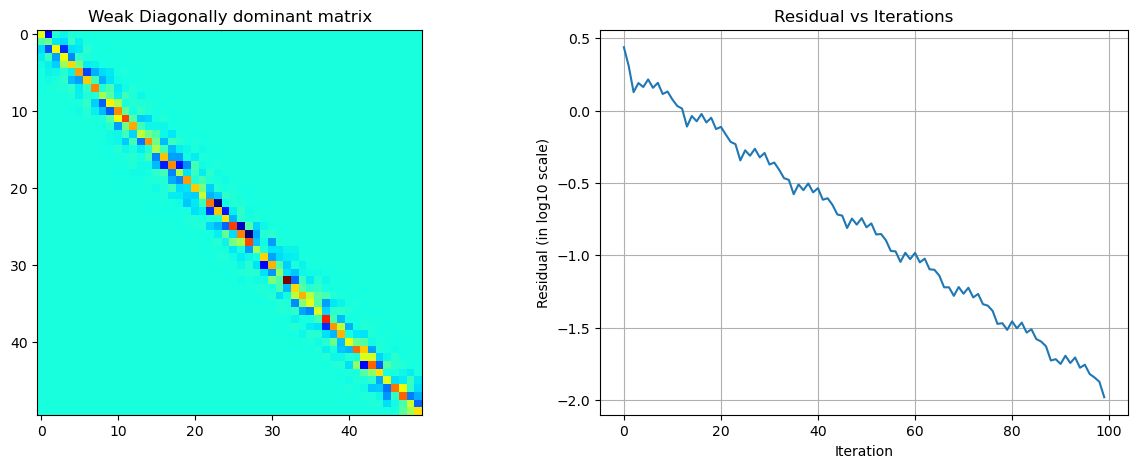

In [8]:
n = 50
amat, x_true, y = generate_weak_diagonally_dominant_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Weak Diagonally dominant matrix')

residuals = []
for i in range(100):
    x_pred = compute_jacoby_solution(amat=amat, y=y, num_iter=i)

    residual = np.max(np.absolute(x_true - x_pred))
    residuals.append(residual)

ax[1].plot(range(len(residuals)), np.log10(residuals))
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].grid()

plt.show()

Теперь у нас матрица с менее выраженным диагональным преобладанием и снова видно, что сходимость становится хуже

## Метод Гаусса — Зейделя

В отличие от прошлого метода, в методе Гаусса-Зейделя чтобы посчитать все координаты вектора $x^{(t+1)}$, можно использовать не только $x^{(t)}$, но и уже посчитанные координаты этого вектора на этой же итерации

Пусть $x^{(t)}$ --- решение на $t$ шаге. Тогда на следующем шаге решение вычисляется следующим образом:

$$
x_i^{(t+1)} = \left( b_i - \sum\limits_{j < i} A_{ij} x_j^{(t+1)} - \sum\limits_{j > i} A_{ij} x_j^{(t)} \right) / A_{ii}
$$

Пусть матрица $A = L + U^{\star}$, где $L$ --- нижняя треугольная матрица, $U^{\star}$ --- строго верхняя треугольная матрица (нулевая диагональ). Тогда уравнение можно переписать в виде:

$$
Ax = y \iff Lx = b - U^{\star}x \implies x^{(t+1)} = L^{-1} (b - U^{\star} x^{(t)})
$$

Или в ином виде:

$$
x^{(t+1)} = (I - L^{-1} A) x^{(t)} + L^{-1} y
$$

In [9]:
def solve_l_system(lmat: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    :param lmat: Lower matrix of the linear system.
    :param y: Right-hand side vector.
    :return: Solution vector of the linear system.
    """
    n, _ = lmat.shape
    x = np.zeros_like(y)
    for i in range(n):
        x[i] = (y[i] - np.sum(lmat[i, :i] * x[:i])) / lmat[i, i]
    return x


def compute_matrix_decomposition(amat: np.ndarray) -> (np.ndarray, np.ndarray):
    """
    :param amat: Matrix of the linear system.
    :return: Strictly upper and lower triangular matrix decomposition
    """
    n, _ = amat.shape
    lmat = np.zeros_like(amat)
    umat = np.zeros_like(amat)
    for i in range(n):
        lmat[i, :(i + 1)] = amat[i, :(i + 1)]
        if i < n - 1:
            umat[i, (i + 1):] = amat[i, (i + 1):]
    return umat, lmat


def initialize_gauss_seidel(y: np.ndarray) -> np.ndarray:
    """
    Initialize a vector of zeros with the same shape as input 'y'.

    :param y: Input array.
    :return: A zero-initialized array with the same shape as 'y'.
    """
    return np.zeros_like(y)


def compute_gauss_seidel_single_step(
    x: np.ndarray, lmat: np.ndarray, umat: np.ndarray, y: np.ndarray
) -> (np.ndarray, np.ndarray):
    """
    Perform a single step of the Gauss-Seidel method for a linear system.

    :param x: Current solution vector.
    :param lmat: Lower matrix of the linear system.
    :param umat: Strictly upper matrix of the linear system.
    :param y: Right-hand side vector.
    :return: New solution vector after step.
    """
    new_y = y - np.dot(umat, x)
    return solve_l_system(lmat, new_y)


def compute_gauss_seidel_solution(amat: np.ndarray, y: np.ndarray, num_iter: int = 1000) -> np.ndarray:
    """
    Compute the solution using the Gauss-Seidel method for a linear system.

    :param amat: Matrix of the linear system.
    :param y: Right-hand side vector.
    :param num_iter: Number of iterations. Default is 1000.
    :return: Solution vector after the specified number of iterations.
    """
    umat, lmat = compute_matrix_decomposition(amat=amat)
    x_curr = initialize_gauss_seidel(y)
    x_next = x_curr.copy()
    for _ in range(num_iter):
        x_next = compute_gauss_seidel_single_step(x=x_curr, lmat=lmat, umat=umat, y=y)
        x_curr = x_next.copy()
    return x_curr

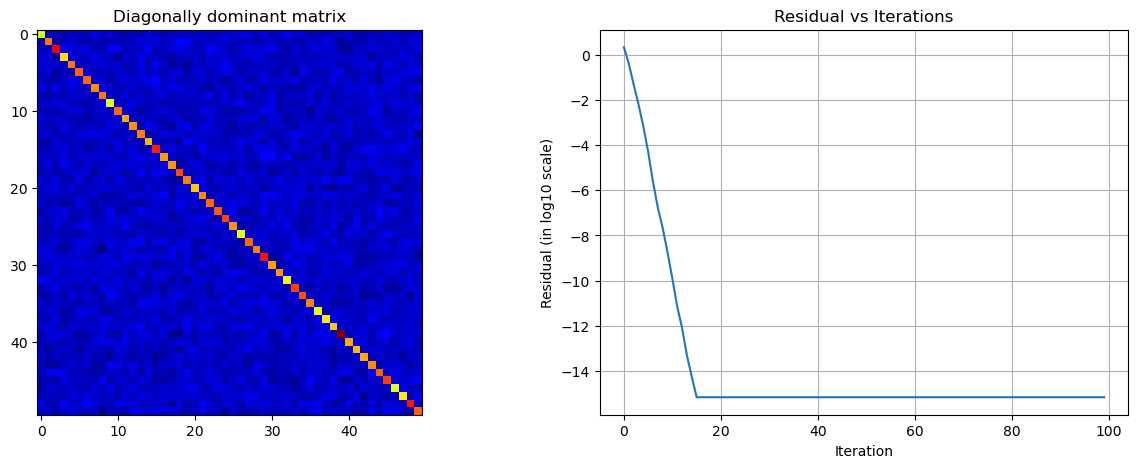

In [10]:
n = 50
amat, x_true, y = generate_diagonally_dominant_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Diagonally dominant matrix')

residuals = []
for i in range(100):
    x_pred = compute_gauss_seidel_solution(amat=amat, y=y, num_iter=i)

    residual = np.max(np.absolute(x_true - x_pred))
    residuals.append(residual)

ax[1].plot(range(len(residuals)), np.log10(residuals))
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].grid()

plt.show()

## Сравнение методов

Теперь сравним сходимость метода Якоби и Гаусса-Зейделя для разных матриц

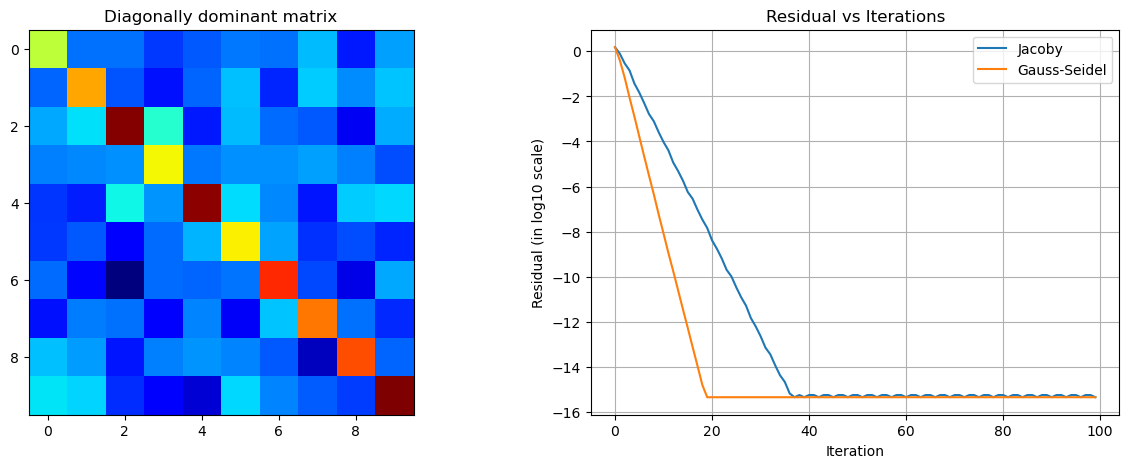

In [11]:
n = 10
amat, x_true, y = generate_diagonally_dominant_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Diagonally dominant matrix')

jacoby_residuals = []
gauss_seidel_residuals = []
for i in range(100):
    x_jacoby = compute_jacoby_solution(amat=amat, y=y, num_iter=i)
    x_gauss_seidel = compute_gauss_seidel_solution(amat=amat, y=y, num_iter=i)

    residual_jacoby = np.max(np.absolute(x_true - x_jacoby))
    residual_gauss_seidel = np.max(np.absolute(x_true - x_gauss_seidel))

    jacoby_residuals.append(residual_jacoby)
    gauss_seidel_residuals.append(residual_gauss_seidel)

ax[1].plot(range(len(jacoby_residuals)), np.log10(jacoby_residuals), label='Jacoby')
ax[1].plot(range(len(gauss_seidel_residuals)), np.log10(gauss_seidel_residuals), label='Gauss-Seidel')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].legend()
ax[1].grid()

plt.show()

Видно, что метод Гаусса-Зейделя лучше сходится, чем метод Якоби

Проверим на матрицах, у которых не так сильно выражено диагональное преобладание

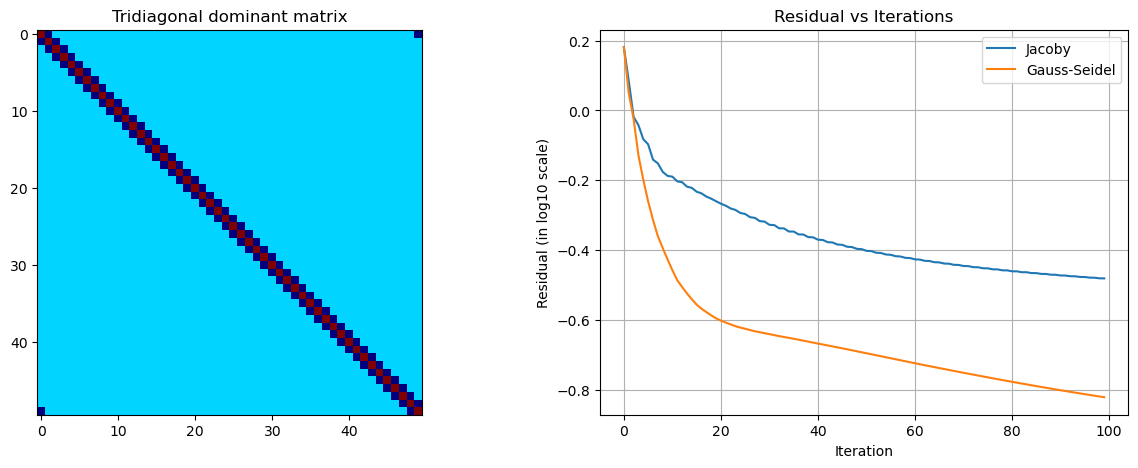

In [12]:
n = 50
amat, x_true, y = generate_tridiag_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Tridiagonal dominant matrix')

jacoby_residuals = []
gauss_seidel_residuals = []
for i in range(100):
    x_jacoby = compute_jacoby_solution(amat=amat, y=y, num_iter=i)
    x_gauss_seidel = compute_gauss_seidel_solution(amat=amat, y=y, num_iter=i)

    residual_jacoby = np.max(np.absolute(x_true - x_jacoby))
    residual_gauss_seidel = np.max(np.absolute(x_true - x_gauss_seidel))

    jacoby_residuals.append(residual_jacoby)
    gauss_seidel_residuals.append(residual_gauss_seidel)

ax[1].plot(range(len(jacoby_residuals)), np.log10(jacoby_residuals), label='Jacoby')
ax[1].plot(range(len(gauss_seidel_residuals)), np.log10(gauss_seidel_residuals), label='Gauss-Seidel')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].legend()
ax[1].grid()

plt.show()

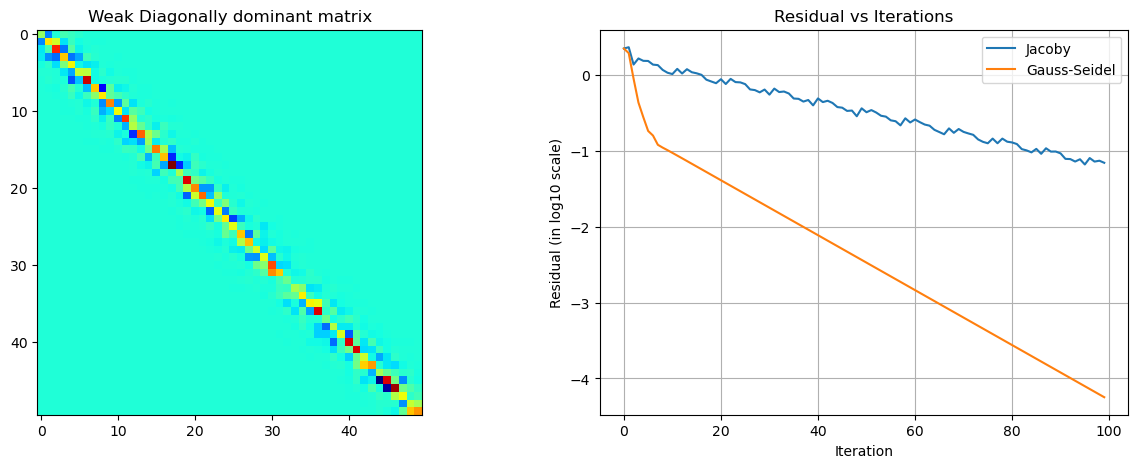

In [13]:
n = 50
amat, x_true, y = generate_weak_diagonally_dominant_linear_system_equations(dim=n)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(amat)
ax[0].set_title('Weak Diagonally dominant matrix')

jacoby_residuals = []
gauss_seidel_residuals = []
for i in range(100):
    x_jacoby = compute_jacoby_solution(amat=amat, y=y, num_iter=i)
    x_gauss_seidel = compute_gauss_seidel_solution(amat=amat, y=y, num_iter=i)

    residual_jacoby = np.max(np.absolute(x_true - x_jacoby))
    residual_gauss_seidel = np.max(np.absolute(x_true - x_gauss_seidel))

    jacoby_residuals.append(residual_jacoby)
    gauss_seidel_residuals.append(residual_gauss_seidel)

ax[1].plot(range(len(jacoby_residuals)), np.log10(jacoby_residuals), label='Jacoby')
ax[1].plot(range(len(gauss_seidel_residuals)), np.log10(gauss_seidel_residuals), label='Gauss-Seidel')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Residual (in log10 scale)')
ax[1].set_title('Residual vs Iterations')
ax[1].legend()
ax[1].grid()

plt.show()

И снова видим, что сходимость у Гаусса-Зейделя лучше, чем у метода Якоби